In [1]:
%pylab inline
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product
import itertools

wine = pd.read_csv('monthly-australian-wine-sales.csv',',', index_col=['month'], parse_dates=['month'], dayfirst=True)
wine.sales = wine.sales * 1000

Populating the interactive namespace from numpy and matplotlib


# Стабилизация дисперсии

In [2]:
#оценим дисперсию, коэф >0.05, значит нужно стабилизировать
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(wine.sales)[1])

Критерий Дики-Фуллера: p=0.051161


In [3]:
#Сделаем преобразование Бокса-Кокса для стабилизации дисперсии:

wine['sales_box'], lmbda = stats.boxcox(wine.sales)
#plt.figure(figsize(15,7))
#wine.sales_box.plot()
#plt.ylabel(u'Transformed wine sales')
print("Оптимальный параметр преобразования Бокса-Кокса: %f" % lmbda)
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(wine.sales_box)[1])

Оптимальный параметр преобразования Бокса-Кокса: 0.236675
Критерий Дики-Фуллера: p=0.029565


In [4]:
y=wine.sales_box

# грид серч параметров для SARIMAX

In [26]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 3)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_result = [0, 0, 10000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            print('ARIMA{} x {} - AIC: {}'.format(param, param_seasonal, results.aic))

            if results.aic < best_result[2]:
                best_result = [param, param_seasonal, results.aic]
        except:
            continue
            
print('\nBest Result:', best_result)

ARIMA(0, 0, 0) x (0, 0, 0, 12) - AIC: 6474.304367275091
ARIMA(0, 0, 0) x (0, 0, 1, 12) - AIC: 5928.41912798672
ARIMA(0, 0, 0) x (0, 0, 2, 12) - AIC: 5471.79222013513
ARIMA(0, 0, 0) x (0, 1, 0, 12) - AIC: 5293.024422664011
ARIMA(0, 0, 0) x (0, 1, 1, 12) - AIC: 4900.423850715358
ARIMA(0, 0, 0) x (0, 1, 2, 12) - AIC: 4509.221568548839
ARIMA(0, 0, 0) x (0, 2, 0, 12) - AIC: 5050.095536260269
ARIMA(0, 0, 0) x (0, 2, 1, 12) - AIC: 4585.896442440063
ARIMA(0, 0, 0) x (0, 2, 2, 12) - AIC: 4206.46095491816
ARIMA(0, 0, 0) x (1, 0, 0, 12) - AIC: 5325.036765831645
ARIMA(0, 0, 0) x (1, 0, 1, 12) - AIC: 5296.291845062846
ARIMA(0, 0, 0) x (1, 0, 2, 12) - AIC: 4891.435228922299
ARIMA(0, 0, 0) x (1, 1, 0, 12) - AIC: 4924.847527202966
ARIMA(0, 0, 0) x (1, 1, 1, 12) - AIC: 4893.107534656695
ARIMA(0, 0, 0) x (1, 1, 2, 12) - AIC: 4505.081916712288
ARIMA(0, 0, 0) x (1, 2, 0, 12) - AIC: 4618.210416509704
ARIMA(0, 0, 0) x (1, 2, 1, 12) - AIC: 4581.273445910994
ARIMA(0, 0, 0) x (1, 2, 2, 12) - AIC: 4188.47427594

ARIMA(0, 1, 2) x (1, 1, 0, 12) - AIC: 4906.696345990997
ARIMA(0, 1, 2) x (1, 1, 1, 12) - AIC: 4798.414114567762
ARIMA(0, 1, 2) x (1, 1, 2, 12) - AIC: 4412.866414322958
ARIMA(0, 1, 2) x (1, 2, 0, 12) - AIC: 4612.104535502039
ARIMA(0, 1, 2) x (1, 2, 1, 12) - AIC: 4491.900334611709
ARIMA(0, 1, 2) x (1, 2, 2, 12) - AIC: 4099.049805540031
ARIMA(0, 1, 2) x (2, 0, 0, 12) - AIC: 5022.013778708944
ARIMA(0, 1, 2) x (2, 0, 1, 12) - AIC: 5023.625279876295
ARIMA(0, 1, 2) x (2, 0, 2, 12) - AIC: 4924.04691537732
ARIMA(0, 1, 2) x (2, 1, 0, 12) - AIC: 4509.45711924623
ARIMA(0, 1, 2) x (2, 1, 1, 12) - AIC: 4511.167758863934
ARIMA(0, 1, 2) x (2, 1, 2, 12) - AIC: 4409.83609607111
ARIMA(0, 1, 2) x (2, 2, 0, 12) - AIC: 4206.060845937844
ARIMA(0, 1, 2) x (2, 2, 1, 12) - AIC: 4196.309738094906
ARIMA(0, 1, 2) x (2, 2, 2, 12) - AIC: 4099.981416103488
ARIMA(0, 2, 0) x (0, 0, 0, 12) - AIC: 6101.87132150986
ARIMA(0, 2, 0) x (0, 0, 1, 12) - AIC: 5616.133220454721
ARIMA(0, 2, 0) x (0, 0, 2, 12) - AIC: 5184.796541710

In [ ]:
#Best result: ARIMA(2, 1, 1) x (0, 1, 1, 12) - AIC: 1007

In [15]:
#построим модель по этим параметрам
model=sm.tsa.statespace.SARIMAX(wine.sales_box, order=(2,1,1), 
                                        seasonal_order=(0,1,1,12)).fit()
model.aic

C:\Users\vzhyvov\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vzhyvov\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


1007.8013881939833

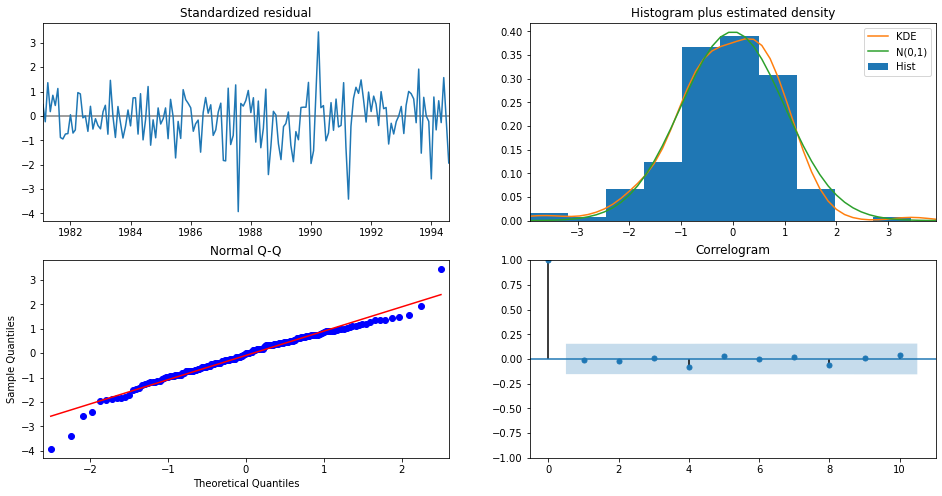

Критерий Стьюдента: p=0.257980
Критерий Дики-Фуллера: p=0.000000


In [21]:
#проверим остатки
model.plot_diagnostics(figsize=(16, 8))
plt.show()

print("Критерий Стьюдента: p=%f" % stats.ttest_1samp(model.resid[13:], 0)[1])
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(model.resid[13:])[1])

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot suggest normal distribution with mean zero.

Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

Остатки несмещены (подтверждается критерием Стьюдента) стационарны (подтверждается критерием Дики-Фуллера и визуально), неавтокоррелированы (подтверждается критерием Льюнга-Бокса и коррелограммой).

In [17]:
#посмотрим саммари по модели
#так как в модели параметр p=2, то у нас 2 коэффициента авторегрессии ar.L1 и ar.L2
#ma.L1 - это скольз средняя (q)
#P>|z| - это уровень значимости (должен быть меньше 0.05)
print(model.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1506      0.085     -1.763      0.078      -0.318       0.017
ar.L2         -0.1990      0.111     -1.800      0.072      -0.416       0.018
ma.L1         -0.8394      0.055    -15.258      0.000      -0.947      -0.732
ma.S.L12      -0.6688      0.052    -12.746      0.000      -0.772      -0.566
sigma2        25.2277      2.144     11.768      0.000      21.026      29.429


Посмотрим, насколько хорошо модель описывает данные:

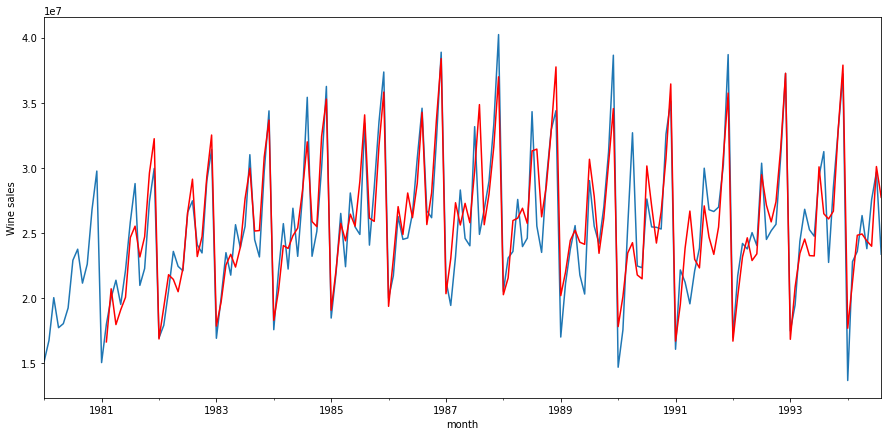

In [22]:
#функция для обратной преобразования дисперсии
def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

wine['model'] = invboxcox(model.fittedvalues, lmbda)
plt.figure(figsize(15,7))
wine.sales.plot()
wine.model[13:].plot(color='r')
plt.ylabel('Wine sales')
pylab.show()

# Прогноз

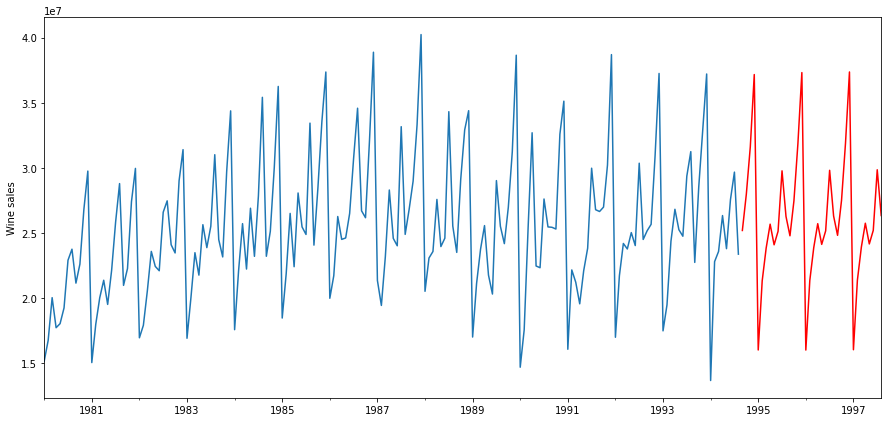

In [24]:
wine2 = wine[['sales']]
date_list = [datetime.datetime.strptime("1994-09-01", "%Y-%m-%d") + relativedelta(months=x) for x in range(0,36)]
future = pd.DataFrame(index=date_list, columns= wine2.columns)
wine2 = pd.concat([wine2, future])
wine2['forecast'] = invboxcox(model.predict(start=176, end=211), lmbda)

plt.figure(figsize(15,7))
wine2.sales.plot()
wine2.forecast.plot(color='r')
plt.ylabel('Wine sales')
pylab.show()

# Прогноз к конф интервалами

In [30]:
# Get forecast 24 steps ahead in future
pred_uc = model.get_forecast(steps=24)

# Конф интервалы
pred_ci = pred_uc.conf_int()

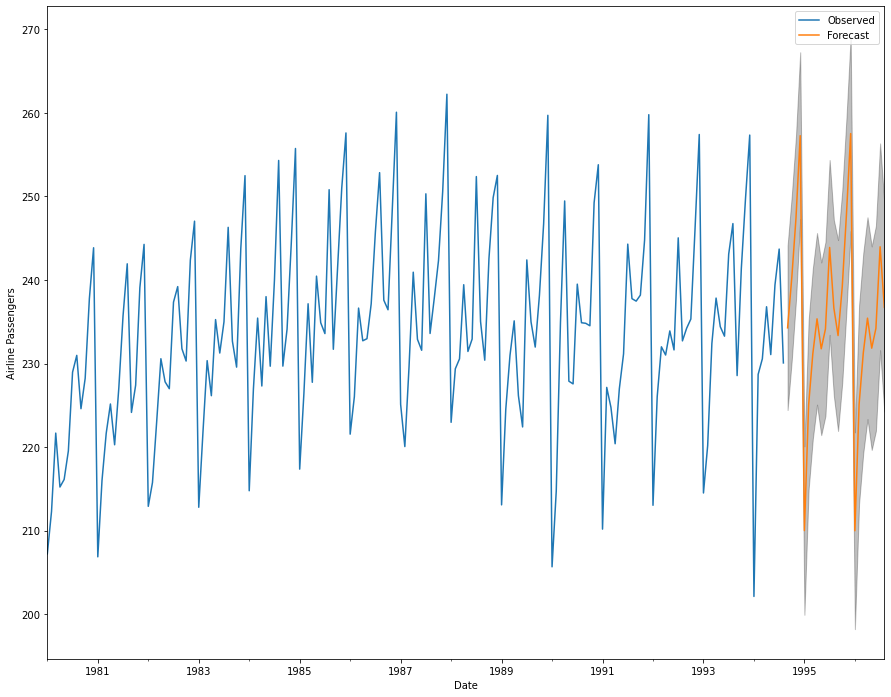

In [31]:
ax = y.plot(label='Observed', figsize=(15, 12))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')

plt.legend()
plt.show()

# Оценка прогноза

Если моделей неск, то можно сранивать качество прогноза
Трнеируем модель на трейне и оцениваем на тесте
Метрик много - ниже функция для их расчета

In [37]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})